# (저와 같은) 초보 중에서도 초보를 위한 베이스라인

### 저와 같은 초보 중에서도 초보들이 저처럼 시간낭비?를 하지 않기를 바라는 마음으로 이렇게 코드공유를 해봅니다.

####! 이미 한번이라도 제출해본 적이 있으신 분은 안보고 넘어가셔도 좋습니다 !



이 코드 공유는 아래의 어려움을 겪으신 분들을 위한 베이스라인? 코드입니다.
- 데이콘이라는걸 처음 알게 된 분들이 **경험삼아 한번이라도 제출하고 싶은 경우**
- 베이스라인대로 코드를 돌려봤는데 데이터프레임 칼럼명(헤더)가 깨져서 당황하신 분들
- 제공되는 기본 베이스라인코드를 그대로 돌려봤는데 본인이 코드 실행해서 만들어진 **submission.csv와 sample_submission.csv가 서로 다르게 생겨서** 당황하신 분들
- sklearn에서 **GridSearchCV**를 써본적이 없는 분들
- **SMAPE**를 어떻게 loss함수로 지정해야하는지 몰라 포기하셨던 분들



거의 대다수의 분들은 위의 사항에 해당되지 않음을 알고있습니다...만 그래도 저같이 판다스 람다함수 같은 기본적인 것도 못 외워서 검색하고 어디를 실수했는지 못찾아서 거의 하루를 매달려야 하는 분들도 있기는 있을 것이라고 생각하여 올려봅니다


(주의) 기존 베이스라인코드를 많이 베껴왔습니다.

# 데이터 불러오고 모양 확인하기

In [1]:
%ls

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: F04D-2B81

 C:\Users\seoul\DACON\Lightbm 디렉터리

2022-03-22  오후 05:34    <DIR>          .
2022-03-22  오후 05:34    <DIR>          ..
2022-03-22  오후 04:57    <DIR>          .ipynb_checkpoints
2022-03-22  오후 04:49            44,931 [베이스라인]_데이콘 베이스라인 코드 (LGBM) .ipynb
2022-03-22  오후 05:34           308,138 [베이스라인]_데이콘 초보의 초보에의한 초보를위한 LGBM 베이스라인.ipynb
2022-03-22  오후 04:57           190,029 sample_submission.csv
2022-03-22  오후 04:57           304,584 test.csv
2022-03-22  오후 04:57         6,908,536 train.csv
2022-03-22  오후 04:45           304,417 전력사용량 예측 3.22 스터디 공유용.ipynb
               6개 파일           8,060,635 바이트
               3개 디렉터리  32,956,370,944 바이트 남음


In [2]:
#Library Imports
import numpy as np  # 넘파이 : 수치 계산 library
import pandas as pd  # 판다스 CV를 조작 및 분석할 수 있게 해준다.
# import math 
import math
import matplotlib.pyplot as plt
import os  # 디렉토리 변경
from sklearn.model_selection import GridSearchCV  # 파라미터 설정 고민을 줄여주는 고마운 친구
from sklearn.metrics import make_scorer  # loss function 커스터마이징

from lightgbm import LGBMRegressor  # 전 LGBMRegressor 만을 사용해서 돌려보았습니다.
from sklearn.model_selection import train_test_split  # train, valid set 제작



In [3]:
# 데이터 로드 (인코딩은 euc-kr)
train=pd.read_csv('train.csv', encoding='euc-kr') #한글 문자열 코딩 시 사용
test=pd.read_csv('test.csv', encoding='euc-kr') #pd.read_csv 폴더 내의 csv를 읽어오는 것이다. Colab 말고 Jupyter notebook으로 할 때 주의!
submission=pd.read_csv('sample_submission.csv', encoding='euc-kr')

In [4]:
train.head(7) #앞 데이터 7개만 확인하여서 어떤 식을 되어있는지 확인

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
5,1,2020-06-01 05,8010.576,16.9,3.4,93.0,0.0,0.0,0.0,0.0
6,1,2020-06-01 06,7978.176,16.7,3.4,90.0,0.1,0.0,0.0,0.0


In [5]:
test.head(7)  # 전력사용량 없음

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,2020-08-25 05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,2020-08-25 06,26.1,1.3,83.0,0.0,0.0,NaN,NaN


In [6]:
submission.head() # 준영님과 같은 경우는 출력 파일도 확인하였다, head : 앞에서 몇번째 까지 출력하는가 ()는 5개만

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0


In [7]:
print(train.shape) #60개 건물 *85일 * 24시간 해서 122400 이다,그리고 항목이 10개이다.  122400 rows × 10 columns
print(test.shape) # 테스트 셋은 그것 보다 훨씬 적다
print(submission.shape) #데이터 전처리 전에 데이터의 모양을 우선 확인한다.

(122400, 10)
(10080, 9)
(10080, 2)


## 데이터 결측치 확인

In [8]:
train.info() #행개수와 모든 데이터가 맞는 것으로 보아 결측치가 없는 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [9]:
test.info() #행 개수가 부족한 것으로 보아 데이터의 결측치가 있음을 알 수 있다. -> 데이터 전처리 시 데이터 결측을 보완해줘야 한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


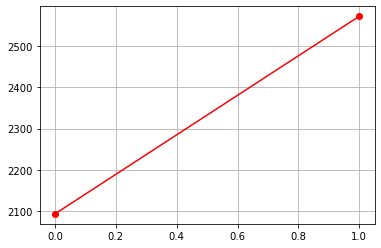

In [10]:
plt.plot(train.groupby('태양광보유').mean()['전력사용량(kWh)'], 'ro-')
plt.grid() #이거 뭘 의미?

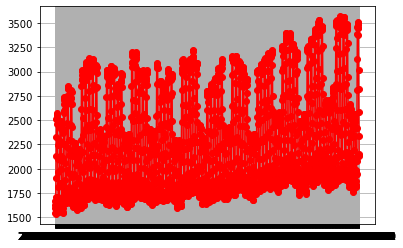

In [11]:
plt.plot(train.groupby('date_time').mean()['전력사용량(kWh)'], 'ro-')
plt.grid()

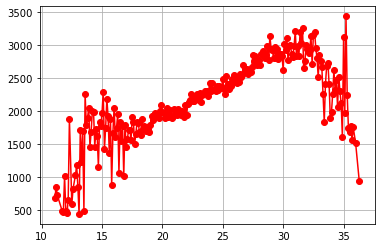

In [12]:
plt.plot(train.groupby('기온(°C)').mean()['전력사용량(kWh)'], 'ro-')
plt.grid()

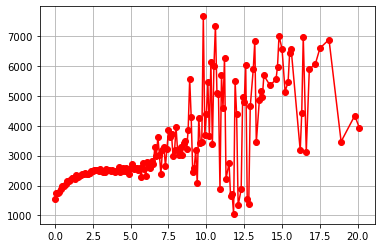

In [13]:
plt.plot(train.groupby('풍속(m/s)').mean()['전력사용량(kWh)'], 'ro-')
plt.grid()

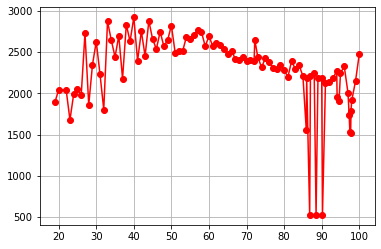

In [14]:
plt.plot(train.groupby('습도(%)').mean()['전력사용량(kWh)'], 'ro-')
plt.grid()

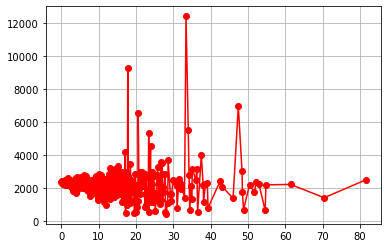

In [15]:
plt.plot(train.groupby('강수량(mm)').mean()['전력사용량(kWh)'], 'ro-')
plt.grid()

<AxesSubplot:>

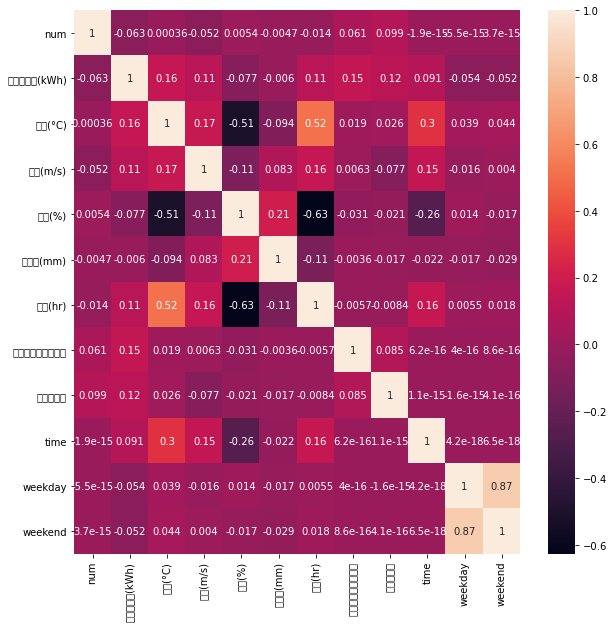

In [32]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot = True)

# 데이터 전처리

In [17]:
test[test['태양광보유'].isna()] #isna : 결측값만을 불러와서 확인해준다. NAN : Not A Number

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10073,60,2020-08-31 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#건물별로 '비전기냉방설비운영'과 '태양광보유'를 판단해 test set의 결측치를 보간해줍니다
train[['num', '비전기냉방설비운영','태양광보유']]
ice={}
hot={}
count=0
for i in range(0, len(train), len(train)//60):
    count +=1
    ice[count]=train.loc[i,'비전기냉방설비운영']
    hot[count]=train.loc[i,'태양광보유']

for i in range(len(test)):
    test.loc[i, '비전기냉방설비운영']=ice[test['num'][i]]
    test.loc[i, '태양광보유']=hot[test['num'][i]]

In [19]:
# 시간, 요일, 주말여부(new!) 추가
def time(x):
    return int(x[-2:])
train['time']=train['date_time'].apply(lambda x: time(x))
test['time']=test['date_time'].apply(lambda x: time(x))

# 평일=0~4, 주말=5~6
def weekday(x):
    return pd.to_datetime(x[:10]).weekday()
train['weekday']=train['date_time'].apply(lambda x :weekday(x))
test['weekday']=test['date_time'].apply(lambda x :weekday(x))

# 평일=0, 주말=1
train['weekend']=train['weekday'].apply(lambda x: 0 if x < 4 else 1)
test['weekend']=test['weekday'].apply(lambda x: 0 if x < 4 else 1)

In [20]:
#loc : Pandas 에서 df의 행, 또는 열 데이터를 조회할 수 있다
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,weekday,weekend
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0,0,1,0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,1,0
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2,1,0
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,0.0,0.0,3,1,0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,1.0,1.0,19,0,0
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,1.0,1.0,20,0,0
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0,21,0,0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,1.0,1.0,22,0,0


In [21]:
# 기온, 풍속, 습도 등, 기타 결측치를 적당히 1/3, 2/3 수치로 보간해줍니다.
test = test.interpolate(method='values')  
test.head(3)

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,weekday,weekend
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.0,0.0,0.0,0,1,0
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.0,0.0,0.0,1,1,0
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.0,0.0,0.0,2,1,0


In [22]:
train.head(3)

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,weekday,weekend
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0,0


# 모델링

In [23]:
# 학습용set 생성
train.drop('date_time', axis=1, inplace=True)  # 학습에 불필요한 날짜 제거
train_x=train.drop('전력사용량(kWh)', axis=1)  # 문제
train_y=train[['전력사용량(kWh)']]  # 정답

X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=156)

In [24]:
X_train.head(1)

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,weekday,weekend
91868,46,21.0,5.2,80.0,0.0,0.0,1.0,0.0,20,2,0


In [25]:
y_train.head(1)

,전력사용량(kWh)
91868,1609.632


In [26]:
# loss function : SMAPE 정의
# from sklearn.metrics import mean_absolute_error
def smape(true, pred):
    true = np.array(true)  # np.array로 바꿔야 에러 없음
    pred = np.array(pred)
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred)))  # *2 , *100은 상수이므로 생략
SMAPE = make_scorer(smape, greater_is_better=False)  # smape 값이 작아져야하므로 False

In [27]:
# 파라미터 설정, 모델생성 함수
def get_best_params(model, params):
    grid_model = GridSearchCV(
        model,
        param_grid = params,  # 파라미터
        cv=5,  # Kfold : 5
        scoring= SMAPE)  #loss function

    grid_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=100)
    scr = grid_model.best_score_
    print(f'{model.__class__.__name__} 최적 score 값 {scr}')
    return grid_model.best_estimator_

In [28]:
# 파라미터 후보군 설정
# 어떤 파라미터로 하는게 좋을지 고민된다면 고민하는 것들을 리스트 안에 다 넣어보세요 알아서 골라줄겁니다.
# 저는 예시로 learning_rate만 0.1 or 0.01 중 더 좋은걸 골라달라고 했습니다.
params = {}
params['boosting_type'] = ['gbdt']
params['objective'] = ['regression']
params['n_estimators'] = [100]
params['learning_rate'] = [0.1, 0.01]  
params['subsample'] = [1]

In [29]:
# 모델정의
model=LGBMRegressor(params)

In [33]:
# 학습진행
best_lgbm = get_best_params(model, params)
best_lgbm  # learning_rate 0.1 or 0.01 중, 0.01이 더 좋았다고 하는군요. 

C:\Users\seoul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\seoul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\seoul\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 734, in fit
    super(LGBMRegressor, self).fit(X, y, sample_weight=sample_weight,
  File "C:\Users\seoul\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 594, in fit
    self._Booster = train(params, train_set,
  File "C:\Users\seoul\anaconda3\lib\site-packages\lightgbm\engine.py", line 228, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\seoul\anaconda3\lib\site-packages\lightgbm\basic.py", line 1714, in __init__
    train_set.construct().handle,
  File

NotFittedError: All estimators failed to fit

In [34]:
# 기타 지표로 에러 측정
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_lgbm.predict(X_train)

mse_score = mean_squared_error(y_train, y_pred)
r2_score = r2_score(y_train, y_pred)
print('MSE:', mse_score)
print('R2 :', r2_score)

NameError: name 'best_lgbm' is not defined

In [35]:
# 모델저장, 로드
from sklearn.externals import joblib
joblib.dump(best_lgbm, 'best_lgbm.pkl')
load_lgbm = joblib.load('best_lgbm.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\seoul\anaconda3\lib\site-packages\sklearn\externals\__init__.py)

# 제출용 데이터

In [ ]:
# 모델에 넣기 위해 날짜칼럼 제거
test_x = test.drop('date_time', axis=1)

In [ ]:
# 모델 예측
submission_y = best_lgbm.predict(test_x)

In [ ]:
# submission.csv 생성
test['answer'] = submission_y
test['num_date_time'] = test.apply(lambda x: str(x['num']) +' '+ x['date_time'], axis=1)
submission = test[['num_date_time', 'answer']]
submission.to_csv('submission.csv', index=False)
submission